# Personality Sprint - Individual Project
------

### Sally Levesque
 I did this NLP classification project while studying at Explore Data Science Academy




## Table of Contents
<a class="anchor" id="contents"></a>

- **Problem Statement**
- **Import Libraries**
- **Import & Inspect Data**
- **Natural Language Processing**
- **Build Classification Models**
- **Import Test Data**
- **Predict test data labels from winning model**



## Problem Statement
-----------
<a class="anchor" id="prob"></a>

### Can you accurately predict someone's personality type based on what they have written?
### Data
The Kaggel [Myers-Briggs Personality dataset](https://www.kaggle.com/datasnaek/mbti-type)
Labelled dataset
Text: 50 posts from each individual, posts where made on an online forum discussing personality
Labels: Each idividual is labelled as a Myers Briggs Personality Type. That is a combination of 4 letters, each indicating a different trait. Each trait can have 2 values. 

### Solution
 - Use NLP to vectorize the text. 
 - Split into test and train datasets.
 - Train models using each of the following:
     - LogisticRegression
     - KNeighborsClassifier
     - Support Vector Machine: Linear Kernal
     - Support Vector Machine: RBF Kernal       
     - Naive Bayes
     - LinearDiscriminantAnalysis
     - QuadraticDiscriminantAnalysis
     - DecisionTreeClassifier
     - RandomForestClassifier
     - AdaBoostClassifier(),   
     - MLPClassifier(alpha=1)    
     - MultinomialNB    
 - Access the models using Accuracy,Precision, Recall and F1 Train
 - Choose the best model
 - Apply chosen model to an unseen test set

## Import Libraries
-----------
<a class="anchor" id="imp"></a>

In [1]:
#Dataframes etc
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

#Machine learning:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

## ML Cross validation and metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


## ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

#Natural language processing
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
## to automate the NLP extraction
from sklearn.feature_extraction.text import CountVectorizer


### Runtime data
------
<a class="anchor" id="run"></a>
These variables allow one to run different versions of the code depending on their value


In [2]:

#running on Kaggle of locally? 
    # path to read files is different is on a local machine or on Kaggle
kaggle=False

#fraction of data to train
# sample_frac = 1 to run on the full dataset
sample_frac = 0.2   
print('Fraction of data to train: ',sample_frac*100,'%')

#the training outputs a results reports. set the name of this file
results_file='All_Results_04.05.20percent.csv'

#notes to be added to training dataframe - for records about this train event
notes='Data Trained: ' + str(sample_frac*100) + '%' + '  Run on Kaggle: ' + str(kaggle) + 'min_df=.01, max_df= 0.9'            

#the training outputs a results reports. set the name of this file
results_file='All_Results_final_submission.csv'

#lists for looping through the various classifiers

names = ['Logistic Regression', 
         #'Nearest Neighbors', 
         #'Linear SVM', 'RBF SVM', 
         #'Naive Bayes', 
         #'LDA',
         ##"QDA",          
         ##"Decision Tree", 
         "Random Forest", 
         #"AdaBoost", 
         ##"Neural Net"
         "Multinomial Naive Bayes"
        ]
classifiers = [
    LogisticRegression(),     # keep -Good F1 Scores, Quick to train
    #KNeighborsClassifier(3),  # drop - High F1 for N, but everyone scores well on N, mediocre on otheresMixed F1 scores (very good for N) , Quick to train (in theory long to test)
    #SVC(kernel="linear", C=0.025), # drop - Decent Scores but too slow, (other faster algorithms do just as well)
    #SVC(gamma=2, C=1),        # drop - Decent Scores but too slow, (other faster algorithms do just as well)
    #GaussianNB(),              # drop - good Scores, good times (Naive Bayes), but can't predict on a sparse matrix (MultinomialNB is better suited)
    #LinearDiscriminantAnalysis(), # round 2: drop - slow  round1:keep - good Scores, good times
    #QuadraticDiscriminantAnalysis(),    # bad scores, (but quick)
    
    #DecisionTreeClassifier(max_depth=5),  #drop, low scores
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),   #keep 
    #AdaBoostClassifier(),   # drop - too slow
    ##MLPClassifier(alpha=1)    #drop - scores not good
    MultinomialNB()           #performs similar to GaussianNB, but is able to predict from a sparse matrix
]

#split_rows: 
 #False: Leave data rows in original form: each row shows all 50 posts from one individual
 #True:: Split posts into sperate rows (typically 50 per individual) 
split_rows = False

Fraction of data to train:  20.0 %


### Some Useful Constants
------



In [3]:
# List of mbti types (each type is a combination of 4 traits)
type_labels = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 
               'ISTP', 'ISFP', 'INFP', 'INTP', 
               'ESTP', 'ESFP', 'ENFP', 'ENTP', 
               'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']

# The column headings per trait
traits=['E/I','N/S','T/F','J/P'] 

trait_vectors = ['I','N','T','J'] # These traits will be encoded as 1
not_trait_vectors= ['E','S','F','P'] # These traits will be encoded as 0




## Import & Inspect Data
-----
<a class="anchor" id="inspect"></a>

In [4]:
## read data
#file stored in different place if run on kaggle
if kaggle==True:
    df = pd.read_csv("../input/train.csv")
else:
    df = pd.read_csv("train.csv")



In [5]:
df.shape

(6506, 2)

In [6]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
df['posts'][1]

"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da

### Investigate Distribution of the 4 Traits

In [8]:
#Add indicators for each of the 4 traits

df['E/I']=df['type'].str[0]
df['N/S']=df['type'].str[1]
df['T/F']=df['type'].str[2]
df['J/P']=df['type'].str[3]

df.head()

,type,posts,E/I,N/S,T/F,J/P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


**Distribution of the 16 personality types:**

In [9]:
s_metrics=df['type'].value_counts()
s_percent = s_metrics/s_metrics.sum()
df_metrics=pd.concat([s_metrics, s_percent], axis=1, keys=['data count','data percentage'])
df_metrics

,data count,data percentage
INFP,1386,0.213034
INFJ,1100,0.169075
INTP,960,0.147556
INTJ,830,0.127575
ENTP,530,0.081463
ENFP,496,0.076237
ISTP,255,0.039195
ISFP,198,0.030433
ENTJ,167,0.025669
ISTJ,145,0.022287


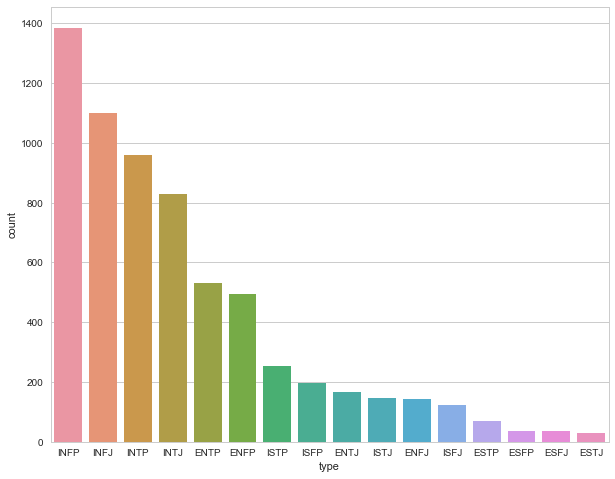

In [10]:
# Count how many of each category

sns.set_style('whitegrid')   #optional formatting
sns.countplot(x='type',data=df,order = df['type'].value_counts().index)



**Distribution of the 4 personality traits:**

To be better than chance, the accuracy of any model must be better than the percentage distribution for each type

In [11]:
s_count=pd.Series() #an empty series
s_percent=pd.Series()

for t in traits:
    s1 = df[t].value_counts(normalize=False, sort=True) # Counts
    s2 = df[t].value_counts(normalize=True, sort=True)  # percentages
    s_count=s_count.append(s1)
    s_percent=s_percent.append(s2)
    
trait_metrics=pd.concat([s_count, s_percent], axis=1, keys=['count','percentage'])
trait_metrics


,count,percentage
I,4998,0.768214
E,1508,0.231786
N,5612,0.862588
S,894,0.137412
F,3518,0.540732
T,2988,0.459268
P,3932,0.604365
J,2574,0.395635


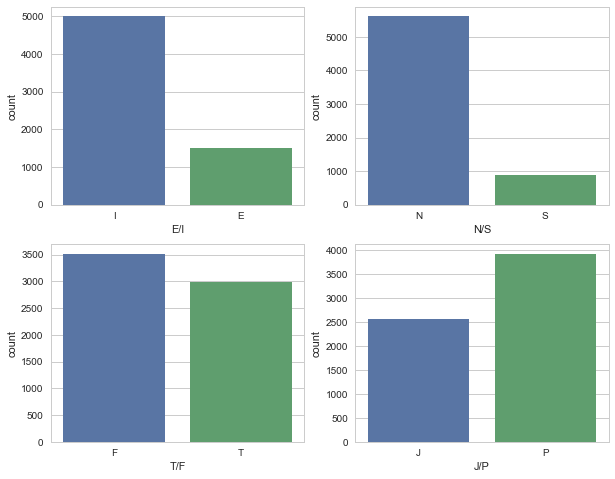

In [12]:
f, axes = plt.subplots(2, 2)

sns.countplot(x='E/I',data=df, ax=axes[0][0])
sns.countplot(x='N/S',data=df, ax=axes[0][1])
sns.countplot(x='T/F',data=df, ax=axes[1][0])
sns.countplot(x='J/P',data=df, ax=axes[1][1])

## Natural Language Processing
-----
<a class="anchor" id="nlp"></a>

### Define NLP Functions
----

In [13]:
import string

def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])



### NLP Cleaning 

In [14]:
if split_rows == True:
    ## split the rows so that each post is a different row
    all_mbti = []
    for i, row in df.iterrows():
        for post in row['posts'].split('|||'):
            all_mbti.append([row['type'], post])
    all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])
    print('Posts split')
else: 
    all_mbti=df
    all_mbti=all_mbti.rename(index=str, columns={"posts": "post"})
    print('Posts not split')

all_mbti.head()

Posts not split


,type,post,E/I,N/S,T/F,J/P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


In [15]:
## remove urls, replace with 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web '
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

## make lower case
all_mbti['post'] = all_mbti['post'].str.lower()

## remove punctuation
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation_numbers)

In [16]:
all_mbti.head()

,type,post,E/I,N/S,T/F,J/P
0,INFJ,urlweb urlweb enfp and intj moments urlweb ...,I,N,F,J
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P
2,INTP,good one urlweb of course to which i say i...,I,N,T,P
3,INTJ,dear intp i enjoyed our conversation the oth...,I,N,T,J
4,ENTJ,youre firedthats another silly misconception t...,E,N,T,J


### Create the Predictor Variables
------

**Encode the letters traits**

*This notebook uses the term 'trait' to refer to an individual letter pair 
and 'type' for a combination of all 4 letters,* 
- *INTP is **type** *
- *'I/E' is a **trait** *


*Strictly speaking the letter pairs should be referred to as *dichotomies* , but 'traits' is quicker to type*


In [17]:
for i, t in enumerate(trait_vectors):
        all_mbti[t] = all_mbti['type'].apply(lambda x: x[i] == t).astype('int')

all_mbti.head()

,type,post,E/I,N/S,T/F,J/P,I,N,T,J
0,INFJ,urlweb urlweb enfp and intj moments urlweb ...,I,N,F,J,1,1,0,1
1,ENTP,im finding the lack of me in these posts very ...,E,N,T,P,0,1,1,0
2,INTP,good one urlweb of course to which i say i...,I,N,T,P,1,1,1,0
3,INTJ,dear intp i enjoyed our conversation the oth...,I,N,T,J,1,1,1,1
4,ENTJ,youre firedthats another silly misconception t...,E,N,T,J,0,1,1,1


In [18]:
#checking the encoding makes sense
all_mbti.groupby('type').sum()

,I,N,T,J
type,,,,
ENFJ,0,143,0,143
ENFP,0,496,0,0
ENTJ,0,167,167,167
ENTP,0,530,530,0
ESFJ,0,0,0,35
ESFP,0,0,0,0
ESTJ,0,0,30,30
ESTP,0,0,71,0
INFJ,1100,1100,0,1100


### Find Benchmarks per Trait
-------------

In order to be better than a random guess, each classifier must be better than the benchmark percentage for that type


In [19]:
#Create a series with the benchmark for each of th 4 traits


b = {'I' : 0.0, 'N' : 0.0, 'T' : 8.0, 'J' : 0.0}
benchmarks =  pd.Series(b)

for t in trait_vectors:
    benchmarks[t] = np.mean(all_mbti[t] == 1)  ##nifty way to calculate the percentage with I=1

benchmarks
    
    

I    0.768214
J    0.395635
N    0.862588
T    0.459268
dtype: float64

### Use CountrVectorizer to explore traits
---------

**sklearn CountVectorizer:**

* converts the text to vectors of counts of each word 
* tokenizes, removes stopwords and vectorizes

Here we create a different count_vectorizer for each trait and have a look at how the top twenty words differ for each pair

In [20]:

#create a vectorizer vocabulary that's different for each type

vects=['vect_I','vect_N','vect_T','vect_J']

for i,t in enumerate( trait_vectors):
    vects[i]=CountVectorizer(lowercase=True, stop_words='english', max_features=20)
    df_trait = all_mbti[all_mbti[t]==1]
    X_count = vects[i].fit_transform(df_trait['post'])
    print(t)
    print(vects[i].get_feature_names())
    
    vects[i]=CountVectorizer(lowercase=True, stop_words='english', max_features=20)
    df_trait = all_mbti[all_mbti[t]==0]
    X_count = vects[i].fit_transform(df_trait['post'])
    print('not',t)
    print(vects[i].get_feature_names())
    print(' ')

I
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot', 'love', 'make', 'people', 'really', 'say', 'things', 'think', 'time', 'urlweb', 'want', 'way']
not I
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot', 'love', 'make', 'people', 'really', 'say', 'things', 'think', 'time', 'type', 'want', 'way']
 
N
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot', 'love', 'make', 'people', 'really', 'say', 'things', 'think', 'time', 'urlweb', 'want', 'way']
not N
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot', 'love', 'people', 'really', 'say', 'things', 'think', 'time', 'type', 'urlweb', 'want', 'way']
 
T
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'make', 'people', 'really', 'say', 'things', 'think', 'time', 'type', 'urlweb', 'want', 'way', 'youre']
not T
['dont', 'feel', 'good', 'im', 'ive', 'just', 'know', 'like', 'lot', 'love', 'people', 'really', 'say', 'things', 'think', 'time', 'type', 'urlweb', 'wa

## Build Classification Models
------------
<a class="anchor" id="build"></a>

### Create the dataset for the ML Algorithms
-----------


In [21]:
print('training on ', sample_frac*100 , ' percent of the data')

training on  20.0  percent of the data


In [22]:
vect = CountVectorizer(stop_words='english', min_df=.01, max_df= 0.9)

#To reduce processing time,  only work with a subset of the data 
#sample(f) shuffles the rows and selects f*number of rows  ( 0<f<=1 ) 
train_mbti = all_mbti.sample(frac=sample_frac,random_state=27)
train_mbti.shape

(1301, 10)

In [23]:
#Vectorize the training data
X = vect.fit_transform(train_mbti['post'])

### Train, validate and evaluate models 
--------

In [24]:
#train for each trait independently
#train on a number of classifyers
#choose the classifyer type which gives the bext F1 Test value

#a dataframe for the results
all_results=[]
#dict holding the best classifier for each trait
best_models={'I':classifiers[0],
                'N':classifiers[0],
                'T':classifiers[0],
                'J':classifiers[0]}


for t in trait_vectors: #begin traitloop

    print ('---------------------------------')
    print ('Training {:s} personality type...'.format(t))
    print ('---------------------------------')
        
    y=train_mbti[t]  #y=all_mbti['I']....etc 

    #split and shuffle the data
    #X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), y[:n])
    X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, random_state=27)
    
    benchmark_train = np.mean(y_train == 1)
    benchmark_test = np.mean(y_test == 1)
    print ('train benchmark =', benchmark_train)
    print('test benchmark = ', benchmark_test) 
    print ('=================================')
    
    
    ## Build all The Classification Models
    best_F1_test = 0
    results = []
    models = {}
    confusion = {}
    class_report = {}

    for name, clf in zip(names, classifiers):    #begin classifier loop
        
        print ('Fitting {:s} model...'.format(name))
        run_time = %timeit -q -o clf.fit(X_train, y_train)

        print ('... predicting')
        y_pred = clf.predict(X_train)   
        y_pred_test = clf.predict(X_test)

        print ('... scoring')
        accuracy  = metrics.accuracy_score(y_train, y_pred)
        precision = metrics.precision_score(y_train, y_pred)
        recall    = metrics.recall_score(y_train, y_pred)

        f1        = metrics.f1_score(y_train, y_pred)    
        f1_test   = metrics.f1_score(y_test, y_pred_test)  
        if f1_test > best_F1_test:
            best_models[t] = clf
            best_F1_test = f1_test
            
        # save the results to dictionaries
        models[name] = clf    
        confusion[name] = metrics.confusion_matrix(y_train, y_pred)
        class_report[name] = metrics.classification_report(y_train, y_pred)

        results.append([name, accuracy, precision, recall, f1, benchmark_train, f1_test, benchmark_test, run_time.best, t, notes])
        all_results.append([name, accuracy, precision, recall, f1, benchmark_train, f1_test, benchmark_test, run_time.best, t, notes])
    #end classifier loop
     
    #all_results.append(results)
    
    results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'Train Benchmark','F1 Test', 'Test Benchmark', 'Train Time','Trait','Notes'])
    results.set_index('Classifier', inplace= True)
    #print('Trait:',t)
    #print(results.sort_values('F1 Test', ascending=False))
    
#end traits loop    
    
all_results=pd.DataFrame(all_results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'Train Benchmark', 'F1 Test', 'Test Benchmark', 'Train Time','Trait','Notes'])
print(all_results)
print('All done :) ')


---------------------------------
Training I personality type...
---------------------------------
train benchmark = 0.756923076923
test benchmark =  0.769938650307
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
---------------------------------
Training N personality type...
---------------------------------
train benchmark = 0.865641025641
test benchmark =  0.837423312883
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


... predicting
... scoring
---------------------------------
Training T personality type...
---------------------------------
train benchmark = 0.488205128205
test benchmark =  0.460122699387
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
---------------------------------
Training J personality type...
---------------------------------
train benchmark = 0.398974358974
test benchmark =  0.358895705521
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting Multinomial Naive Bayes model...
... predicting
... scoring
                 Classifier  Accuracy  Precision    Recall  F1 Train  \
0       Logistic Regression  1.000000   1.000000  1.000000  1.000000   
1             Random Forest  0.756923   0.756923  1.000000  0.861646   
2   Multinomial Naive Bayes  0.958974   0.98879

In [25]:
all_results.to_csv(results_file)
all_results

,Classifier,Accuracy,Precision,Recall,F1 Train,Train Benchmark,F1 Test,Test Benchmark,Train Time,Trait,Notes
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.756923,0.892720,0.769939,0.128345,I,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
1,Random Forest,0.756923,0.756923,1.000000,0.861646,0.756923,0.870017,0.769939,0.032302,I,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
2,Multinomial Naive Bayes,0.958974,0.988796,0.956640,0.972452,0.756923,0.873294,0.769939,0.042398,I,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
3,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.865641,0.916376,0.837423,0.124398,N,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
4,Random Forest,0.865641,0.865641,1.000000,0.927982,0.865641,0.911519,0.837423,0.032028,N,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
5,Multinomial Naive Bayes,0.989744,0.998804,0.989336,0.994048,0.865641,0.915371,0.837423,0.042518,N,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
6,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.488205,0.821317,0.460123,0.189131,T,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
7,Random Forest,0.603077,0.694323,0.334034,0.451064,0.488205,0.301370,0.460123,0.037707,T,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
8,Multinomial Naive Bayes,0.946667,0.941667,0.949580,0.945607,0.488205,0.830065,0.460123,0.047679,T,Data Trained: 20.0% Run on Kaggle: Falsemin_d...
9,Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.398974,0.652720,0.358896,0.197429,J,Data Trained: 20.0% Run on Kaggle: Falsemin_d...


In [26]:
best_models

{'I': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'J': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'N': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'T': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)}

## Import Test Data
---------
<a class="anchor" id="test"></a>

In [27]:
#file stored in different place if run on kaggle
if kaggle==True:
    t_df = pd.read_csv("../input/train.csv")
else:
    t_df=pd.read_csv("test.csv")
t_df.head()

,type,posts
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...
1,NaN,'You: hello :) Stranger: hii You: how are you ...
2,NaN,'What worked for me was knowing that limerence...
3,NaN,'Please forget about him. You should definitel...
4,NaN,"'Ooh, ENTJ Celestia is actually an interesting..."


## Predict test data labels from winning model
-----
 <a class="anchor" id="predict"></a>
#### Clean posts

In [28]:
## preprocessing:

#use chosen model - use the index
#choose classifier from list of classifiers above




#best = 0 # *need method for choosing the best
#name = names[best]
#clf = classifiers[best]

## remove urls, replace with 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web '

## make lower case
t_df['clean_posts'] = t_df['posts'].str.lower()

## remove punctuation
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

t_df['clean_posts'] = t_df['clean_posts'].apply(remove_punctuation_numbers)

t_df.head()



,type,posts,clean_posts
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...,musical linguistic logic naturalist tiedgenu...
1,NaN,'You: hello :) Stranger: hii You: how are you ...,you hello stranger hii you how are you today ...
2,NaN,'What worked for me was knowing that limerence...,what worked for me was knowing that limerence ...
3,NaN,'Please forget about him. You should definitel...,please forget about him you should definitely ...
4,NaN,"'Ooh, ENTJ Celestia is actually an interesting...",ooh entj celestia is actually an interesting t...


#### Vectorize data and apply model

In [29]:
tX = vect.transform(t_df['clean_posts'])
y_pred={'I':[],
        'N':[],
        'T':[],
        'J':[],}

for t in trait_vectors:
    print ('Predicting {:s} ...'.format(t))
    y_pred[t] = best_models[t].predict(tX)   
    
y_pred

Predicting I ...
Predicting N ...
Predicting T ...
Predicting J ...


{'I': array([0, 0, 1, ..., 0, 0, 1]),
 'J': array([0, 0, 1, ..., 0, 0, 1]),
 'N': array([0, 0, 1, ..., 0, 0, 1]),
 'T': array([0, 0, 1, ..., 0, 0, 0])}

In [30]:
for i, t in enumerate(trait_vectors):
    t_df[traits[i]]=y_pred[t]
    
t_df.head()

,type,posts,clean_posts,E/I,N/S,T/F,J/P
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...,musical linguistic logic naturalist tiedgenu...,0,0,0,0
1,NaN,'You: hello :) Stranger: hii You: how are you ...,you hello stranger hii you how are you today ...,0,0,0,0
2,NaN,'What worked for me was knowing that limerence...,what worked for me was knowing that limerence ...,1,1,1,1
3,NaN,'Please forget about him. You should definitel...,please forget about him you should definitely ...,0,0,0,0
4,NaN,"'Ooh, ENTJ Celestia is actually an interesting...",ooh entj celestia is actually an interesting t...,1,1,1,1


#### Convert 1/0 Vectors into letters


In [31]:
def toLetter(trait,value):
    letters=['','','','']
    if value == 1:
        letters = ['I', 'N', 'T', 'J']
    if value == 0:
        letters = ['E', 'S', 'F', 'P']
    return letters[trait]   


for i, t in enumerate(traits):
        #all_mbti[t] = 't'
        t_df[t] = t_df[t].apply(lambda x: toLetter(i,x))
                
t_df.head()


,type,posts,clean_posts,E/I,N/S,T/F,J/P
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...,musical linguistic logic naturalist tiedgenu...,E,S,F,P
1,NaN,'You: hello :) Stranger: hii You: how are you ...,you hello stranger hii you how are you today ...,E,S,F,P
2,NaN,'What worked for me was knowing that limerence...,what worked for me was knowing that limerence ...,I,N,T,J
3,NaN,'Please forget about him. You should definitel...,please forget about him you should definitely ...,E,S,F,P
4,NaN,"'Ooh, ENTJ Celestia is actually an interesting...",ooh entj celestia is actually an interesting t...,I,N,T,J


In [32]:
t_df[t_df['E/I']=='E']

,type,posts,clean_posts,E/I,N/S,T/F,J/P
0,NaN,Musical Linguistic Logic & Naturalist (tied)|...,musical linguistic logic naturalist tiedgenu...,E,S,F,P
1,NaN,'You: hello :) Stranger: hii You: how are you ...,you hello stranger hii you how are you today ...,E,S,F,P
3,NaN,'Please forget about him. You should definitel...,please forget about him you should definitely ...,E,S,F,P
5,NaN,"Hi, Dupin. I'm 19 and from New Hampshire :)|||...",hi dupin im and from new hampshire thank you ...,E,S,F,P
7,NaN,'Favorites: 1) Indie/Folk - peaceful side of m...,favorites indiefolk peaceful side of me roc...,E,S,F,P
9,NaN,'Here's a short documentary about life as a Ca...,heres a short documentary about life as a cana...,E,S,F,P
10,NaN,'I respect every mind. I just ask a question f...,i respect every mind i just ask a question for...,E,S,F,P
11,NaN,'Perhaps it should be but it definitely isn't....,perhaps it should be but it definitely isntwel...,E,S,T,P
12,NaN,'Im jumping into the middle of this and am too...,im jumping into the middle of this and am too ...,E,S,F,P
14,NaN,'You notice that a good number of responses he...,you notice that a good number of responses her...,E,S,T,P


In [33]:
t_df=t_df[['E/I','N/S','T/F','J/P','posts']]

In [34]:
t_df.tail()

,E/I,N/S,T/F,J/P,posts
2164,E,S,F,P,'https://www.youtube.com/watch?v=t8edHB_h908||...
2165,E,S,F,P,'So...if this thread already exists someplace ...
2166,E,S,F,P,'So many questions when i do these things. I ...
2167,E,S,F,P,'I am very conflicted right now when it comes ...
2168,I,N,F,J,'It has been too long since I have been on per...


#### Explore predicted values

In [35]:
len(t_df)

2169

In [36]:
len(y_pred)

4

In [37]:
for t in trait_vectors:
    print (t,' : ', y_pred[t].mean() ) 
 

I  :  0.388197325957
N  :  0.388197325957
T  :  0.397418165053
J  :  0.388197325957


#### Export as CSV in prescribed format

In [38]:
t_df.to_csv('Sally_Levesque.csv')